In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Задание

# Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением 
# для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

# У вас есть несколько ресторанов в разных частях города и целый штат курьеров. 
# Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня,
# а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень 
# сильно проседает в эффективности. 

# Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать 
# свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома.
# То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

# Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. 
# Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении
# эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь 
# бизнесу принять решение о раскатке новой фичи на всех курьеров.

In [5]:
# Описание данных

# order_id - id заказа
# delivery_time - время доставки в минутах
# district - район доставки
# experiment_group - экспериментальная группа

In [6]:
df = pd.read_csv('experiment_lesson_4.csv')

In [7]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [8]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [9]:
# Задание 1

# Для начала давайте сформулируем гипотезы для проверки.
# Выберите статистические гипотезы, которые мы сможем проверить в этом эксперименте:

$H_0$ : Разницы между средним временем доставки в тестовой и контрольной группе нет

$H_1$ : Разницы между средним временем доставки в тестовой и контрольной группе есть

In [10]:
# Задание 2

In [35]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(10,5)}
)

<Figure size 1440x720 with 0 Axes>

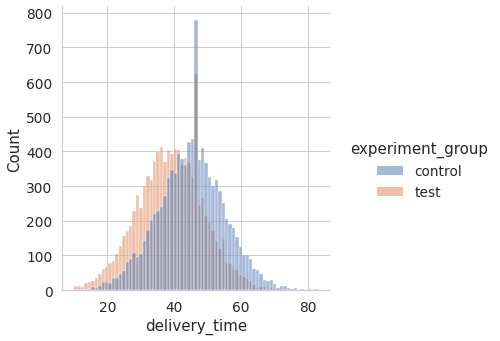

In [31]:
plt.figure(figsize=(20,10))
sns.displot(data=df, x='delivery_time', hue='experiment_group')

(array([  98.,  447., 1162., 2291., 2378., 2255., 1051.,  340.,   61.,
           9.]),
 array([15. , 21.8, 28.6, 35.4, 42.2, 49. , 55.8, 62.6, 69.4, 76.2, 83. ]),
 <a list of 10 Patch objects>)

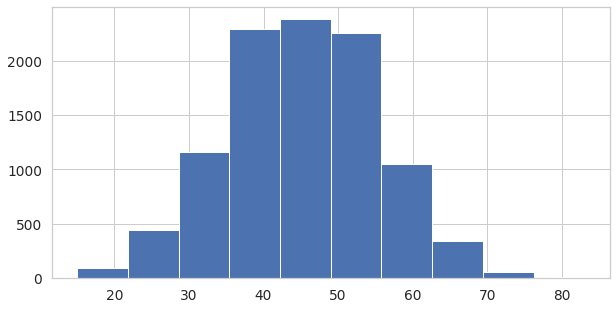

In [36]:
plt.hist(df.query("experiment_group == 'control'").delivery_time)

(array([ 103.,  371., 1244., 1957., 2754., 1943., 1256.,  352.,  104.,
          20.]),
 array([10. , 16.5, 23. , 29.5, 36. , 42.5, 49. , 55.5, 62. , 68.5, 75. ]),
 <a list of 10 Patch objects>)

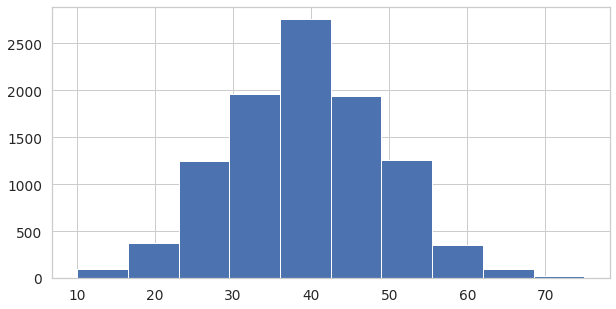

In [39]:
plt.hist(df.query("experiment_group == 'test'").delivery_time)
# plt.hist(df.query("experiment_group == 'control'").delivery_time)


In [41]:
# Задание 4
# Посчитайте количество наблюдений в тестовой и контрольной группе. 
# На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [42]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [43]:
df.shape

(20196, 4)

In [44]:
df.isnull().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [49]:
number_of_test = df.query("experiment_group == 'test'").order_id.nunique()
number_of_control = df.query("experiment_group == 'control'").order_id.nunique()

print('test: ', number_of_test)
print('control: ', number_of_control)

print(abs(number_of_test-number_of_control))

test:  10104
control:  10092
12


In [50]:
# Теперь давайте изучим наши распределения. 
# Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

# Вообще для выборок таких колоссальных размеров мы не обязаны это делать - в отсутствие 
# слишком уж выраженной асимметрии и выбросов в данных t-тест и так работать будет нормально, 
# но посмотреть лишний раз всё равно можно :)

# Обычно нормальность тестируют с помощью теста Шапиро-Уилка (scipy.stats.shapiro()), 
# однако на больших выборках этот тест слишком рьяно находит отклонения от нормальности! 
# Поэтому используйте функцию scipy.stats.normaltest() - она больше адаптирована к большим выборкам:

In [51]:
#работает примерно так
#берём данные нужной нам группы

# данные = датафрейм.query("условие_отбирающее_нужную_группу").колонка

#и кладём в функцию
# scipy.stats.normaltest(данные)

In [52]:
df_test = df.query("experiment_group == 'test'")
df_control = df.query("experiment_group == 'control'")

In [55]:
# Мы отвергаем гипотезу о том что данные Тестовых груп распределены нормально
scipy.stats.normaltest(df_test.delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [57]:
# Мы принимаем гипотезу о том что данные Контрольных груп распределены нормально
scipy.stats.normaltest(df_control.delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [59]:
df_test.delivery_time.std()

9.883308351129061

In [60]:
df_control.delivery_time.std()

9.990016960246372

In [61]:
# Вас могла смутить ненормальность распределения теста, 
# полученная на прошлом шаге - однако если посмотреть на саму форму распределения, 
# то оно не настолько сильно нарушает нормальность, чтобы об этом беспокоиться на таком размере выборки! 
# Поэтому не переживаем 😎

# Теперь пришло время сравнить средние в тесте и контроле.

In [64]:
stats.ttest_ind(df_test.delivery_time, df_control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [65]:
df_test.delivery_time.mean()

39.04681314330958

In [66]:
df_control.delivery_time.mean()

45.065101070154576

In [75]:
d = df_control.delivery_time.mean() - df_test.delivery_time.mean()

d / df_control.delivery_time.mean() * 100

13.354653121660812

In [74]:
round(100 - (1 / (45.065101070154576 / 39.04681314330958)) * 100, 2)

13.35

In [76]:
#####################################################################################

$$
t = \frac{\bar X_1 - \bar X_2}{\sqrt {\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}}
$$

In [77]:
x_1_bar = df_control.delivery_time.mean()
x_2_bar = df_test.delivery_time.mean()

n1 = len(df_control)
n2 = len(df_test)

sd1 = df_control.delivery_time.std()
sd2 = df_test.delivery_time.std()

t = (x_1_bar - x_2_bar) / np.sqrt(sd1**2 / n1 + sd2**2 / n2)

t

43.035552024241454